#### Algorithm that perform better in testing share are
> GradientBoosting

> Failed=0  
 Success=1

In [25]:
import pandas as pd
# pd.set_option('max_columns', 37)
%matplotlib inline

In [26]:
dd = pd.read_csv('0.Data/kickstarter_data_full.csv',low_memory=False)

In [27]:
def drop_columns_further(df):
    date_info=['deadline_month','deadline_day','created_at_month','created_at_day','created_at_hr',
               'launched_at_month','launched_at_day','launched_at_hr','name_len','blurb_len']
    return df.drop(date_info,axis=1)
def drop_useless_columns(df):
    look_useless=['is_starred','is_backing','permissions','pledged','currency','disable_communication','spotlight']
    redundant=['launch_to_state_change','deadline','SuccessfulBool','launch_to_state_change_days']
    state_change_date=['state_changed_at_weekday','state_changed_at_month','state_changed_at_day','state_changed_at_yr'
                      ,'state_changed_at_hr']
    too_much_info=['create_to_launch','launch_to_deadline','launch_to_state_change','location']
    too_much_info1=['state_changed_at','created_at','launched_at']
    too_much_info2=['state_changed_at','created_at','launched_at']
    for_later=['created_at_yr','launched_at_yr','deadline_yr','deadline_hr','launch_to_deadline']
    words=['name','blurb','slug','urls','profile']
    list_to_drop=['USorGB','Unnamed: 0','id','photo','currency_symbol','currency_trailing_code','static_usd_rate','creator','source_url','friends','TOPCOUNTRY']
    drop_list=look_useless+words+list_to_drop+redundant+for_later+too_much_info+too_much_info1+too_much_info2 + state_change_date
    return drop_columns_further(df.drop(drop_list,axis=1))

df1=drop_useless_columns(dd)

### Lets drop row that has nan values and also just keep failed and succesful state values

In [28]:
def drop_nan_and_keep_only_success_failure(data):
    mask = (data['state']=='failed') | (data['state']=='successful')
    return data[mask]

In [29]:
df=drop_nan_and_keep_only_success_failure(df1)

In [30]:
df.head()

,goal,state,country,staff_pick,backers_count,usd_pledged,category,name_len_clean,blurb_len_clean,deadline_weekday,created_at_weekday,launched_at_weekday,create_to_launch_days,launch_to_deadline_days,LaunchedTuesday,DeadlineWeekend
0,1500.0,failed,US,False,0,0.000000,Academic,9.0,16.0,Friday,Saturday,Wednesday,17,36,0,0
1,500.0,failed,US,False,0,0.000000,Academic,4.0,15.0,Friday,Friday,Monday,10,60,0,0
2,100000.0,failed,US,False,5,120.000000,Academic,8.0,10.0,Thursday,Saturday,Sunday,1,60,0,0
3,5000.0,failed,US,False,0,0.000000,Academic,6.0,13.0,Monday,Friday,Saturday,0,30,0,0
4,3222.0,failed,DE,False,17,396.802395,Academic,7.0,18.0,Monday,Wednesday,Thursday,0,32,0,0


In [31]:
scale_mapper = {"failed":0, "successful":1}
df["state"]=df["state"].replace(scale_mapper)

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [32]:
df=df.dropna(axis=0, how='any')

In [33]:
df.head(1)

,goal,state,country,staff_pick,backers_count,usd_pledged,category,name_len_clean,blurb_len_clean,deadline_weekday,created_at_weekday,launched_at_weekday,create_to_launch_days,launch_to_deadline_days,LaunchedTuesday,DeadlineWeekend
0,1500.0,0,US,False,0,0.0,Academic,9.0,16.0,Friday,Saturday,Wednesday,17,36,0,0


In [34]:
df.columns

Index(['goal', 'state', 'country', 'staff_pick', 'backers_count',
       'usd_pledged', 'category', 'name_len_clean', 'blurb_len_clean',
       'deadline_weekday', 'created_at_weekday', 'launched_at_weekday',
       'create_to_launch_days', 'launch_to_deadline_days', 'LaunchedTuesday',
       'DeadlineWeekend'],
      dtype='object')

In [35]:
# from sklearn.preprocessing import RobustScaler
# sc = RobustScaler()
# X=df[['goal']]
# X = sc.fit_transform(X)
import numpy as np
from sklearn.preprocessing import FunctionTransformer
sc = FunctionTransformer(np.log1p)
X=df['goal']
X= sc.transform(df[['goal']])

In [36]:
df.head()

,goal,state,country,staff_pick,backers_count,usd_pledged,category,name_len_clean,blurb_len_clean,deadline_weekday,created_at_weekday,launched_at_weekday,create_to_launch_days,launch_to_deadline_days,LaunchedTuesday,DeadlineWeekend
0,1500.0,0,US,False,0,0.000000,Academic,9.0,16.0,Friday,Saturday,Wednesday,17,36,0,0
1,500.0,0,US,False,0,0.000000,Academic,4.0,15.0,Friday,Friday,Monday,10,60,0,0
2,100000.0,0,US,False,5,120.000000,Academic,8.0,10.0,Thursday,Saturday,Sunday,1,60,0,0
3,5000.0,0,US,False,0,0.000000,Academic,6.0,13.0,Monday,Friday,Saturday,0,30,0,0
4,3222.0,0,DE,False,17,396.802395,Academic,7.0,18.0,Monday,Wednesday,Thursday,0,32,0,0


In [37]:
df[['goal']]=X

In [38]:
df["staff_pick"]=df["staff_pick"].astype(int)

> Dummpy variable created.

In [39]:
df = pd.get_dummies(df, columns=['country'])
df = pd.get_dummies(df, columns=['category'])
df = pd.get_dummies(df, columns=['deadline_weekday'])
df = pd.get_dummies(df, columns=['created_at_weekday'])
df = pd.get_dummies(df, columns=['launched_at_weekday'])
df.shape

(15787, 76)

In [ ]:
df.head()

-----

In [40]:
from sklearn.model_selection import train_test_split
y = df.state
X=df.drop(['state','usd_pledged'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=df.state)

---

In [41]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from confusion_matrix import plot_confusion_matrix, show_confusion_matrix
from confusion_matrix import plot_roc_curve

---

In [42]:
# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(random_state = 0)
classifier.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

classifier score 0.9259024699176694
Confusion Matrix
[[1993  121]
 [ 113  931]]


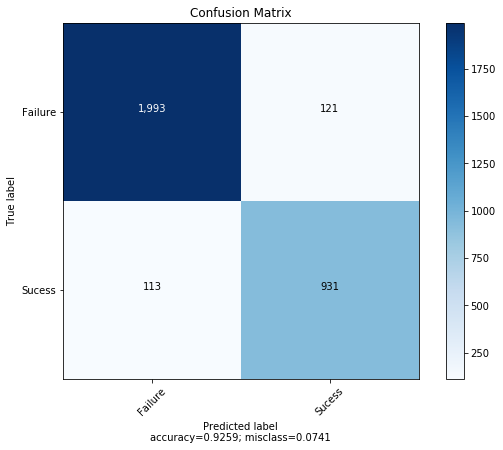

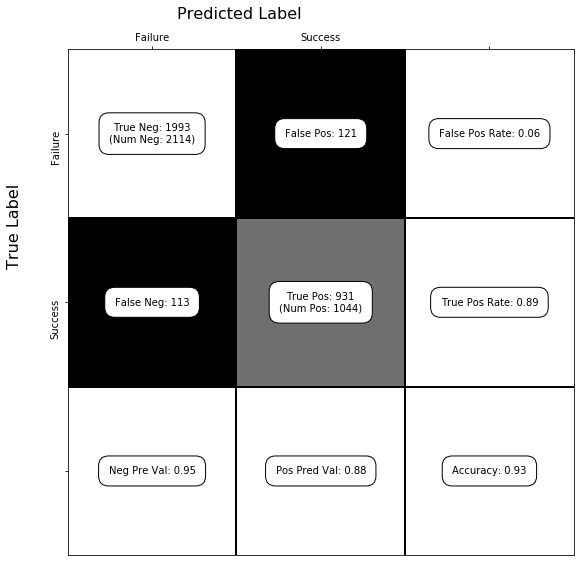

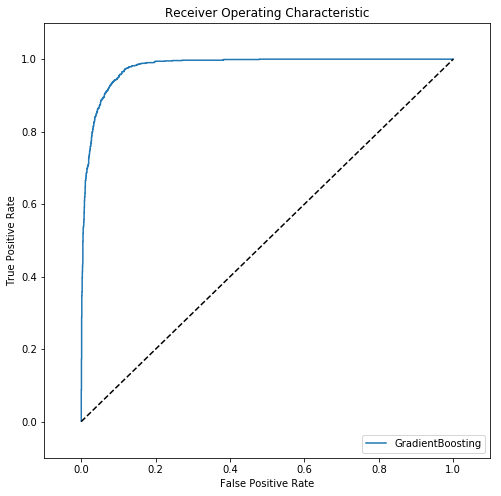

Area under ROC curve 0.9793078074649209


In [43]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print('classifier score',classifier.score(X_test, y_test))
# Display confusion matrix for y_test and pred
cm=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
# Predict PROBABILITIES using regularized KNN
pred_prob = classifier.predict_proba(X_test)
# Get just the prediction for the positive class (1)
pred= [p[1] for p in pred_prob]
fpr, tpr, thresholds = roc_curve(y_test, pred)
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['Failure', 'Sucess'],
                      title        = "Confusion Matrix")
show_confusion_matrix(cm, ['Failure', 'Success'])
plot_roc_curve(fpr, tpr,'GradientBoosting')
print ('Area under ROC curve',auc(fpr, tpr))

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Plot feature importance
feature_importance = classifier.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
print(sorted_idx)
X_train.columns[sorted_idx]
#plt.subplot(1, 2, 2)
#plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, X_train.columns[sorted_idx])
# plt.xlabel('Relative Importance')
# plt.title('Variable Importance')
# plt.show()

[36 33 28 39 40 44 48 22 21 52 54 55 17 30 58 59 68 67 65 64 63 14 62  8
  9 10 61 60 32 56  7 26 73 66 69 29 16 57 72 53 49 71 20 42 11 50 70 51
 15  1 12 45 24 34 27 19 25 13 47 18  3 35  4  6 31  5 38 43 41 46 23 37
  0  2]


Index(['category_Flight', 'category_Comedy', 'country_SG',
       'category_Immersive', 'category_Makerspaces', 'category_Robots',
       'category_Spaces', 'country_LU', 'country_IT', 'category_Webseries',
       'deadline_weekday_Monday', 'deadline_weekday_Saturday', 'country_FR',
       'category_Academic', 'deadline_weekday_Tuesday',
       'deadline_weekday_Wednesday', 'launched_at_weekday_Monday',
       'launched_at_weekday_Friday', 'created_at_weekday_Tuesday',
       'created_at_weekday_Thursday', 'created_at_weekday_Sunday',
       'country_DE', 'created_at_weekday_Saturday', 'DeadlineWeekend',
       'country_AT', 'country_AU', 'created_at_weekday_Monday',
       'created_at_weekday_Friday', 'category_Blues',
       'deadline_weekday_Sunday', 'LaunchedTuesday', 'country_NZ',
       'launched_at_weekday_Wednesday', 'created_at_weekday_Wednesday',
       'launched_at_weekday_Saturday', 'country_US', 'country_ES',
       'deadline_weekday_Thursday', 'launched_at_weekday_Tuesday

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.94      0.94      2114
          1       0.88      0.89      0.89      1044

avg / total       0.93      0.93      0.93      3158



----

**_Lets save the model for later use_**

In [47]:
# Pickle for saving model files
import pickle

In [48]:
# Save winning model as final_model.pkl
with open('final_model.pkl', 'wb') as f:
    pickle.dump(classifier, f)